In [77]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.plotly as py
from plotly.graph_objs import * 
from scipy import stats
from scipy.stats import (median_test, mannwhitneyu)

from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_curve, auc)
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.learning_curve import learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import (cross_val_score, cross_val_predict)
import pickle
from sklearn import preprocessing
%matplotlib inline
import pickle
from sklearn.externals.six import StringIO
import pydot
from __future__ import division
from sklearn import tree
import seaborn as sns

In [78]:
df = pickle.load( open( "save.p", "rb" ) )


In [79]:
df['district'] = df['district'].apply(lambda x: int(x))
y08 = df.loc[df['congyear']== 1]
y10 = df.loc[df['congyear']== 2]
y12 = df.loc[df['congyear'] == 3]

y12['total_sc'] = preprocessing.scale(y12['total'])
y08['total_sc'] = preprocessing.scale(y08['total'])
y10['total_sc'] = preprocessing.scale(y10['total'])
len(df)
frames = [y08, y10, y12]
df = pd.concat(frames)

/Users/Julia/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/Julia/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/Julia/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.

,winner,leader,chairman,power,close2,close5,close10,itemproxy,unitemproxy,ieproxy,...,total,unitemie,itemie,percunitem,percpacs,ie,percie,percind,percstate,total_sc


In [ ]:
pickle.dump( df, open( "save.p", "wb" ) )

In [80]:
fourteen = pd.read_csv('2014 Outside Spending, by Race - OpenSecrets - 2014 Outside Spending, by Race - OpenSecrets.csv')
fourteen['Race'] = fourteen['Race'].apply(lambda x: x.replace('District', ''))
fourteen = fourteen.applymap(lambda x: x.replace('$', ''))
fourteen = fourteen.applymap(lambda x: x.replace(',', '')) 
fourteen['year'] = 6

twelve = pd.read_csv('2012 Outside Spending, by Race - OpenSecrets - 2012 Outside Spending, by Race - OpenSecrets.csv')
twelve['Race'] = twelve['Race'].apply(lambda x: x.replace('District', ''))
twelve = twelve.applymap(lambda x: x.replace('$', ''))
twelve = twelve.applymap(lambda x: x.replace(',', '')) 
twelve['year'] = 5

ten =  pd.read_csv('2010 Outside Spending, by Race - OpenSecrets - 2010 Outside Spending, by Race - OpenSecrets.csv')
ten['Race'] = ten['Race'].apply(lambda x: x.replace('District', ''))
ten = ten.applymap(lambda x: x.replace('$', ''))
ten = ten.applymap(lambda x: x.replace(',', '')) 
ten['year'] = 4

eight = pd.read_csv('2008 Outside Spending, by Race - OpenSecrets - 2008 Outside Spending, by Race - OpenSecrets.csv')
eight['Race'] = eight['Race'].apply(lambda x: x.replace('District', ''))
eight = eight.applymap(lambda x: x.replace('$', ''))
eight = eight.applymap(lambda x: x.replace(',', '')) 
eight['year'] = 3

six = pd.read_csv('2006 Outside Spending, by Race - OpenSecrets - 2006 Outside Spending, by Race - OpenSecrets.csv')
six['Race'] = six['Race'].apply(lambda x: x.replace('District', ''))
six = six.applymap(lambda x: x.replace('$', ''))
six = six.applymap(lambda x: x.replace(',', '')) 
six['year'] = 2

four = pd.read_csv('2004 Outside Spending, by Race - OpenSecrets - 2004 Outside Spending, by Race - OpenSecrets.csv')
four['Race'] = four['Race'].apply(lambda x: x.replace('District', ''))
four = four.applymap(lambda x: x.replace('$', ''))
four = four.applymap(lambda x: x.replace(',', '')) 
four['year'] = 1

In [81]:
dis10 = pd.read_csv('districts110.csv')
dis10['district'] = dis10['district'].apply(lambda x: str(x))
dis10['race'] = dis10['statename'] + '  ' + dis10['district']
dis10 = dis10[['the_geom', 'race']]

In [82]:
frames = [twelve, fourteen]
second = pd.concat(frames)
second['Race'] = second['Race'].replace('South Dakota  1', 'South Dakota  0')
second['Race'] = second['Race'].replace('North Dakota  1', 'North Dakota  0')
second['Race'] = second['Race'].replace('Wyoming  1', 'Wyoming  0')
second['Race'] = second['Race'].replace('Montana  1', 'Montana  0')
second['Race'] = second['Race'].replace('Delaware  1', 'Delaware  0')
second['Race'] = second['Race'].replace('Vermont  1', 'Vermont  0')
second['Race'] = second['Race'].replace('Alaska  1', 'Alaska  0')


In [83]:
frames = [four, six, eight, ten]
first = pd.concat(frames)
first['Race'] = first['Race'].replace('South Dakota  1', 'South Dakota  0')
first['Race'] = first['Race'].replace('North Dakota  1', 'North Dakota  0')
first['Race'] = first['Race'].replace('Wyoming  1', 'Wyoming  0')
first['Race'] = first['Race'].replace('Montana  1', 'Montana  0')
first['Race'] = first['Race'].replace('Delaware  1', 'Delaware  0')
first['Race'] = first['Race'].replace('Vermont  1', 'Vermont  0')
first['Race'] = first['Race'].replace('Alaska  1', 'Alaska  0')

In [84]:
part1 = pd.merge(first, dis10, left_on='Race', right_on='race', how='left')

In [85]:
first['Race'] = first['Race'].apply(lambda x: str(x))
first['Total'] = first['Total'].apply(lambda x: int(x))
first['For Dems'] = first['For Dems'].apply(lambda x: int(x))
first['Against Dems'] = first['Against Dems'].apply(lambda x: int(x))
first['For Repubs'] = first['For Repubs'].apply(lambda x: int(x))
first['Against Repubs'] = first['Against Repubs'].apply(lambda x: int(x))

In [86]:
dis12 = pd.read_csv('districts113.csv')
dis12['district'] = dis12['district'].apply(lambda x: str(x))
dis12['race'] = dis12['statename'] + '  ' + dis12['district']
dis12 = dis12[['the_geom','race']]
dis12

,the_geom,race
0,0106000020E61000001300000001030000000100000026...,Maine 2
1,0106000020E61000000100000001030000000100000015...,Maryland 8
2,0106000020E61000000C000000010300000001000000D8...,Virginia 3
3,0106000020E61000000100000001030000000100000005...,Virginia 9
4,0106000020E61000000100000001030000000100000027...,Virginia 5
5,0106000020E610000001000000010300000001000000F9...,Virginia 10
6,0106000020E610000001000000010300000001000000C8...,Virginia 7
7,0106000020E6100000010000000103000000010000000B...,Virginia 6
8,0106000020E61000000100000001030000000100000016...,Virginia 4
9,0106000020E6100000010000000103000000010000009D...,Virginia 1


## Seperate graphs 

In [10]:
all_yrs = [four, six, eight, ten, twelve, fourteen]
all_yrsdf = pd.concat(all_yrs)
all_yrsdf['Race'] = all_yrsdf['Race'].replace('South Dakota  1', 'South Dakota  0')
all_yrsdf['Race'] = all_yrsdf['Race'].replace('North Dakota  1', 'North Dakota  0')
all_yrsdf['Race'] = all_yrsdf['Race'].replace('Wyoming  1', 'Wyoming  0')
all_yrsdf['Race'] = all_yrsdf['Race'].replace('Montana  1', 'Montana  0')
all_yrsdf['Race'] = all_yrsdf['Race'].replace('Delaware  1', 'Delaware  0')
all_yrsdf['Race'] = all_yrsdf['Race'].replace('Vermont  1', 'Vermont  0')
all_yrsdf['Race'] = all_yrsdf['Race'].replace('Alaska  1', 'Alaska  0')

all_yrsdf['Race'] = all_yrsdf['Race'].apply(lambda x: str(x))
all_yrsdf['Total'] = all_yrsdf['Total'].apply(lambda x: int(x))
all_yrsdf['For Dems'] = all_yrsdf['For Dems'].apply(lambda x: int(x))
all_yrsdf['Against Dems'] = all_yrsdf['Against Dems'].apply(lambda x: int(x))
all_yrsdf['For Repubs'] = all_yrsdf['For Repubs'].apply(lambda x: int(x))
all_yrsdf['Against Repubs'] = all_yrsdf['Against Repubs'].apply(lambda x: int(x))


In [11]:
all_yrs_gp = all_yrsdf.groupby('year').sum()
all_yrs_gp['total_against'] = all_yrs_gp['Against Dems'] + all_yrs_gp['Against Repubs']
all_yrs_gp['total_for'] = all_yrs_gp['For Dems'] + all_yrs_gp['For Repubs']

In [12]:
year = [2004, 2006, 2008, 2010, 2012, 2014]
vep = [60.1, 40.4, 61.6, 41, 58.2, 35.9]
bills = [504+865, 483+1027, 460+1435, 385+1464, 284+722, 296+663]
approval = [37, 19, 30, 19, 17, 14]
disapproval = []

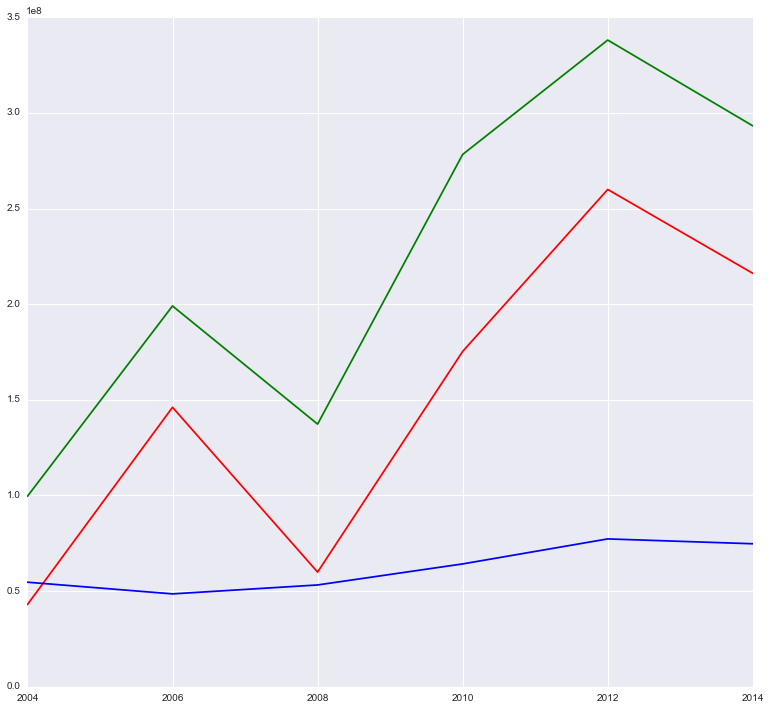

In [68]:
fig = plt.figure(figsize=(13,12))
ax = fig.add_subplot(111)
# plt.plot(year, bills, color = 'blue')
plt.plot(year, all_yrs_gp['Total'], color = 'green')
plt.plot(year, all_yrs_gp['total_against'], color = 'red')
plt.plot(year, all_yrs_gp['total_for'], color = 'blue')

[]

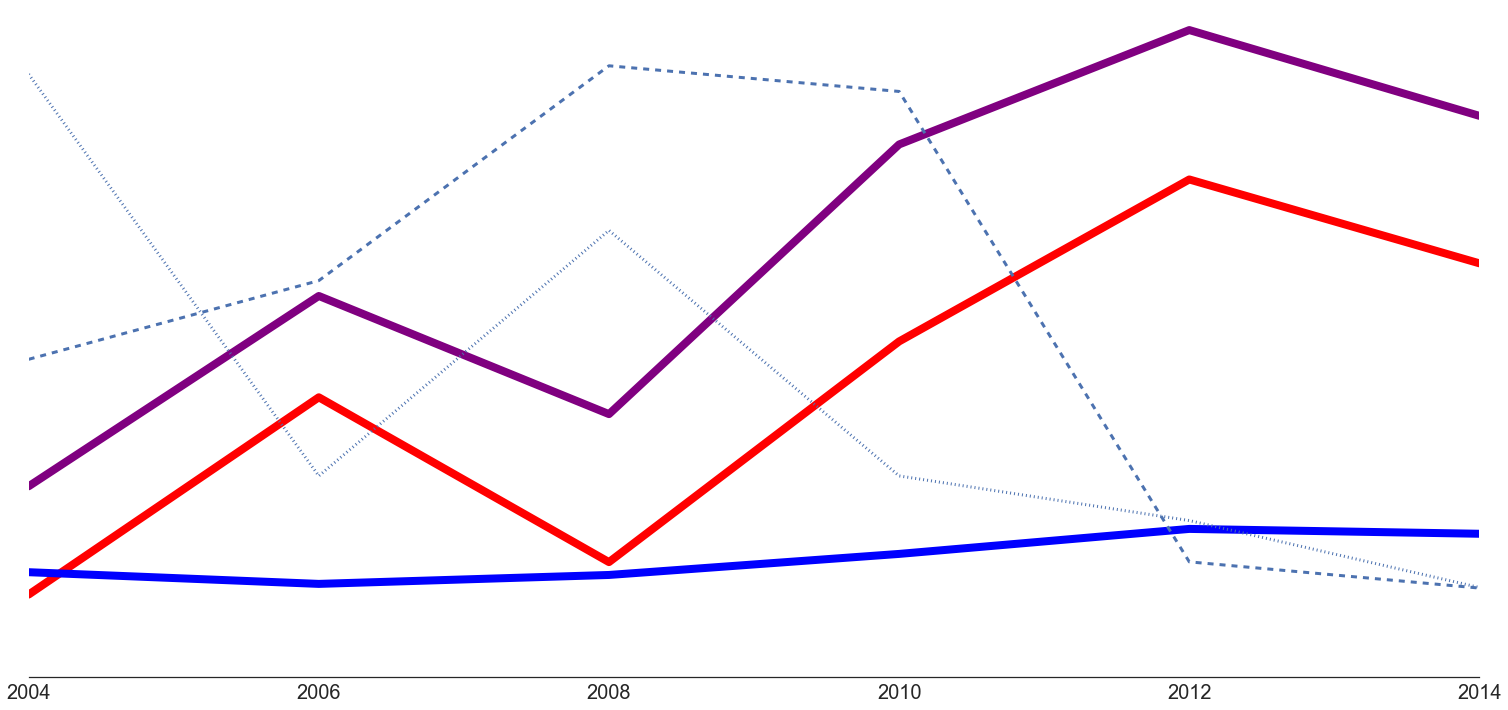

In [60]:
sns.set_style("white")

fig, ax1 = plt.subplots(figsize=(26,12))
plt.xticks(fontsize=20)


ax1.spines["top"].set_visible(False)  
ax1.spines["bottom"].set_visible(False)  
ax1.spines["right"].set_visible(False)  
ax1.spines["left"].set_visible(False)  
ax1.get_xaxis().tick_bottom() 
ax1.set_yticklabels([]) 
ax1.plot(year, all_yrs_gp['Total'], 'purple', linewidth=8)
ax1.plot(year, all_yrs_gp['total_against'], color = 'red', linewidth=8)
ax1.plot(year, all_yrs_gp['total_for'], color = 'blue', linewidth = 8)


ax2 = ax1.twinx()
ax2.spines["top"].set_visible(False)  
ax2.spines["bottom"].set_visible(False)  
ax2.spines["right"].set_visible(False)  
ax2.spines["left"].set_visible(False) 
ax2.set_ylabel= ""
ax2.plot(year, bills, linestyle= "--", linewidth=3)
ax2.set_yticklabels([]) 
ax3 = ax2.twinx()
ax3.spines["top"].set_visible(False)  
 
ax3.spines["right"].set_visible(False)  
ax3.spines["left"].set_visible(False) 
ax2.spines["top"].set_visible(False)  
ax2.spines["bottom"].set_visible(False) 
ax3.plot(year, approval, linestyle = ':', linewidth=3)
ax3.set_ylabel= ""
ax3.set_yticklabels([]) 


,the_geom,race
0,0106000020E61000001300000001030000000100000026...,Maine 2
1,0106000020E61000000100000001030000000100000015...,Maryland 8
2,0106000020E61000000C000000010300000001000000D8...,Virginia 3
3,0106000020E61000000100000001030000000100000005...,Virginia 9
4,0106000020E61000000100000001030000000100000027...,Virginia 5
5,0106000020E610000001000000010300000001000000F9...,Virginia 10
6,0106000020E610000001000000010300000001000000C8...,Virginia 7
7,0106000020E6100000010000000103000000010000000B...,Virginia 6
8,0106000020E61000000100000001030000000100000016...,Virginia 4
9,0106000020E6100000010000000103000000010000009D...,Virginia 1


In [149]:
alll.to_csv('all.csv')

In [88]:
part2 = pd.merge(second, dis12, left_on='Race', right_on='race', how='left')
frames = [part1, part2]

alll = pd.concat(frames)

alll['Total'] = alll['Total'].apply(lambda x: int(x))
alll['For Dems'] = alll['For Dems'].apply(lambda x: int(x))
alll['Against Dems'] = alll['Against Dems'].apply(lambda x: int(x))
alll['For Repubs'] = alll['For Repubs'].apply(lambda x: int(x))
alll['Against Repubs'] = alll['Against Repubs'].apply(lambda x: int(x))
alll['Against'] = alll['Against Dems'] + alll['Against Repubs']
alll['For'] = alll['For Dems'] + alll['For Repubs']
alll['Reps'] = alll['For Repubs'] + alll['Against Dems']
alll['Dems'] = alll['Against Repubs'] + alll['For Dems']
alll['Ratio'] = alll['Against']/alll['For']

In [89]:
alll['standard']= preprocessing.scale(alll['Total'])
alll['Total'] = alll['Total'].apply(lambda x: float(x))
alll['Against'] = alll['Against'].apply(lambda x: float(x))
alll['For'] = alll['For'].apply(lambda x: float(x))
alll['Reps'] = alll['Reps'].apply(lambda x: float(x))
alll['Dems'] = alll['Dems'].apply(lambda x: float(x))

/Users/Julia/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:498: UserWarning:

The scale function assumes floating point values as input, got int64

/Users/Julia/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:145: DeprecationWarning:

Implicitly casting between incompatible kinds. In a future numpy release, this will raise an error. Use casting="unsafe" if this is intentional.

/Users/Julia/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:153: UserWarning:

Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.

/Users/Julia/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:158: DeprecationWarning:

Implicitly casting between incompatible kinds. In a future numpy release, this will raise an error. Use casting="unsafe" if this is intentional.

/Users/Julia/anaconda/lib/python2.7/site-packages/sklearn/preprocess

In [90]:
alll['Total_sc'] = preprocessing.scale(alll['Total'])
alll["Against_sc"] = preprocessing.scale(alll['Against'])
alll["For_sc"] = preprocessing.scale(alll['For'])
alll["Reps_sc"] = preprocessing.scale(alll['Reps'])
alll["Dems_sc"] = preprocessing.scale(alll['Dems'])

In [91]:
alll.to_csv('all.csv')